# Исследование данных о продажах компьютерных игр

Для интернет-магазина компьютерных игр «Стримчик» нужно провести анализ данные о продажах игр. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 
Из открытых источников доступны данные о продажах игр до 2016 года. 

* Name - название игры
* Platform -платформа
* Year_of_Release - год выпуска
* Genre - жанр
* NA_sales - продажи в Северной Америке (миллионы проданных копий)
* EU_sales - продажи в Европе (миллионы проданных копий)
* JP_sales - продажи в Японии (миллионы проданных копий)
* Other_sales - продажи в других странах (миллионы проданных копий)
* Critic_Score - оценка критиков (максимум 100)
* User_Score - оценка пользователей (максимум 10)
* Rating - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Получение основной информации о таблице данных

In [370]:
#импортируем библиотеки и открываем файл
import seaborn as sb
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import re
from scipy import stats as st
pd.set_option('display.max_columns', None)


In [371]:
#Функция, которая будет выводить характеристики датафрейма
def show_info(df_name):
    display(df_name.info())
    display(df_name.describe())
    display(df_name.head())

In [372]:
#Открываем файл
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('/home/olga/workspace/yandex_data_analysys_projects/projects/games.csv') 
pd.set_option('display.max_columns', None)
show_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Промежуточный вывод:** Первичный анализ показывает, что есть пропуски в стобцах с названиями игр, год выпуска игры, жанр, оценка критиков, оценка пользователей, рейтинг от организации ESRB. Таблица describe дает первичное представление о средних, квартильных, максимальных и минимальных значениях, среднеквадратическом октлонении и количестве не пустых строк в столбцах.

## Предобработка данных

### Изменение названия столбцов

In [373]:
#Выведем названия столбцов и преобразуем названия к нижнему регистру
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [374]:
data.columns = data.columns.str.lower()

In [375]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [376]:
#Проверим, есть ли полные дубликаты в таблице
data.duplicated().sum()

0

**Промежуточный вывод:** Привели все названия столбцов к нижнему регистру, проверили есть ли в таблице полные дубликаты строк - их не оказалось.

### Изменение типов данных

In [377]:
#Добавим столбец tbd, чтобы в дальнейшем понимать где стояло это значение. 
data['tbd'] = data['user_score']=='tbd'

In [378]:
# Изменим тип данных столбца user_score на float.
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype(np.float64)

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  tbd              16715 non-null  bool   
dtypes: bool(1), float64(7), object(4)
memory usage: 1.4+ MB


**Промежуточный вывод:** Изменили тип данных в столбцах год и оценка критиков (до 100) на Int64, и то и другое не дробные числа. Тип столбца оценка пользователей (максимум 10) изменили на float64, но перед этим добавили столбец с маркером для tbd, заменили значения tbd в столбце user_score на nan. Tbd - to be determined, переводится как 'будет определено', т.е значение отсутствует сейчас.

### Поиск пропусков

In [380]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
tbd                   0
dtype: int64

In [381]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


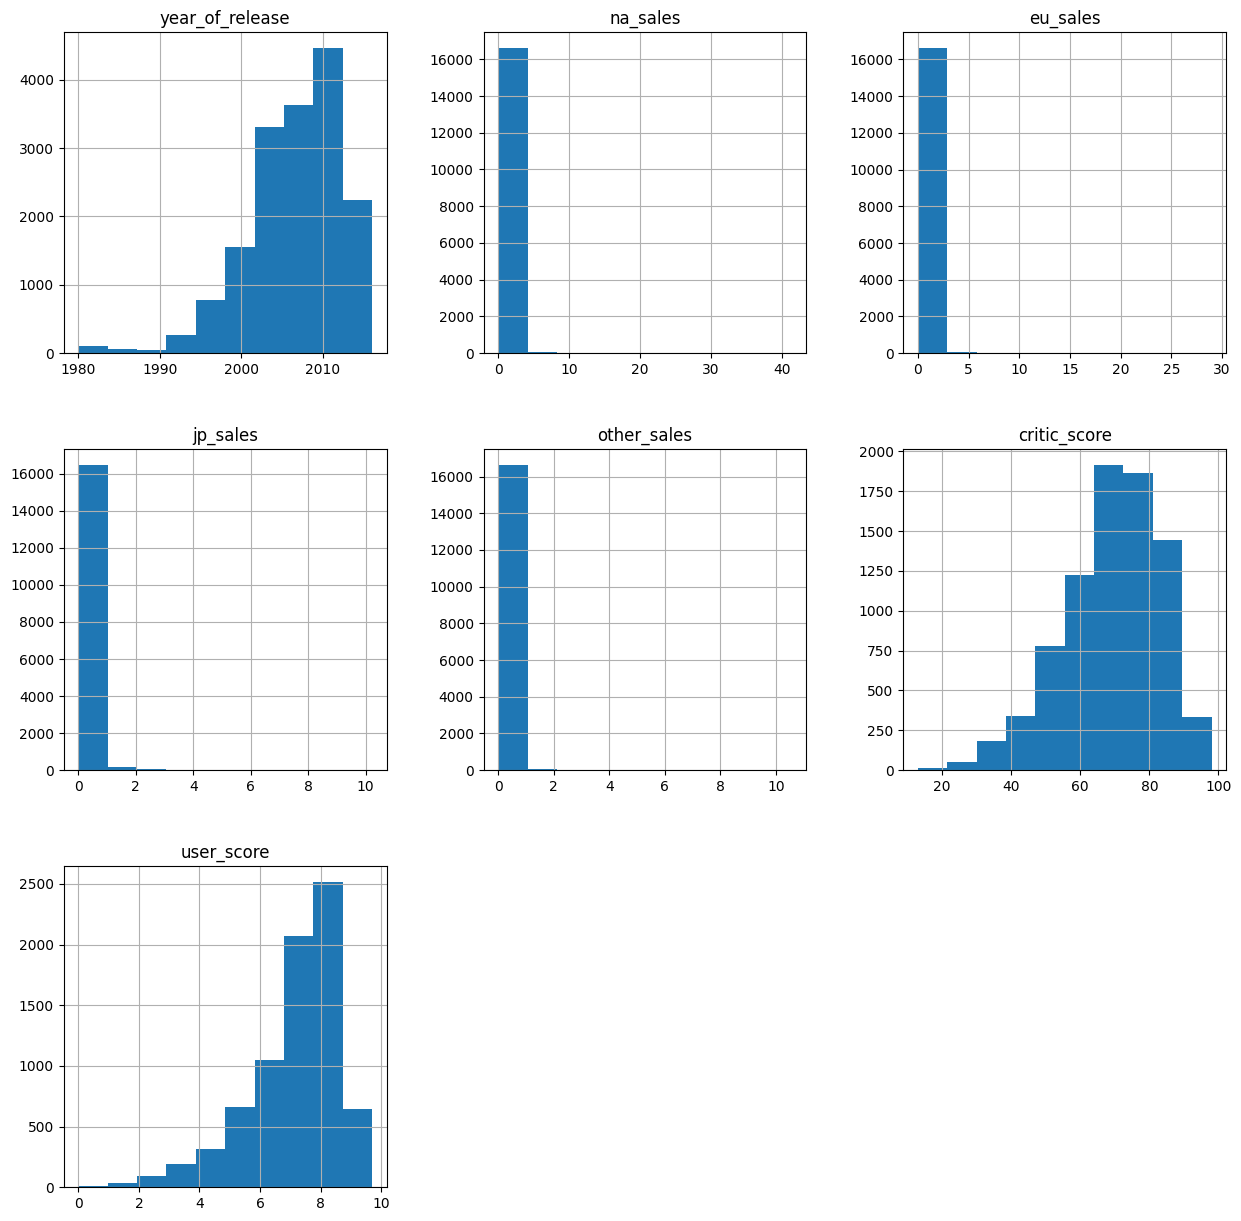

In [382]:
#Построим гистограммы для всех столбцов
data.hist(figsize=(15, 15))
plt.show()

#### Столбец 'name'

In [383]:
#Уникальные значения в столбце 'name' с их количеством.
data['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [384]:
#Пропуски в столбце name
data.loc[data['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,False
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,False


**Промежуточный вывод:** Два пропуска в столбце, вероятно в дальнейшем анализе удалим эти две строки.

#### Столбец 'year_of_release'

In [385]:
#Уникальные значения в столбце 'year_of_release' с их количеством.
data['year_of_release'].value_counts()


2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [386]:
#Пропуски в столбце year_of_release
data.loc[data['year_of_release'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,False
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,False
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,False
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,False
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,True
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,False
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,False
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,False


In [387]:
# Напишем функцию для выделения 4 цифр из названия игры используя регулярные выражения

def substring_name(row):
    try:
        return re.findall(r'\d{4}', row)[0]
    except:
        return 

In [388]:
year = data['name'].apply(substring_name)
year.unique()

array([None, '2015', '2004', '2100', '2005', '2007', '2003', '2012',
       '2008', '2014', '2002', '2006', '2009', '2013', '2011', '2010',
       '2000', '1080', '2001', '1886', '2016', '2070', '2600', '1500',
       '1942', '1999', '2033', '1000', '2017', '2048', '2025', '0122',
       '1001', '1701', '2205', '0081', '2020', '2049', '1692', '1945',
       '0079', '1969', '1996', '1800', '2089', '1946', '2500', '1450',
       '2142', '1943', '3000'], dtype=object)

In [389]:
len(data.loc[data['year_of_release'].isna()==True])*100/len(data)

1.6093329344899792

In [390]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

**Промежуточный вывод:** В столбце с годом выпуска игры есть 269 пропусков (1.6%). Было замечено, что в названиях игр присутствуют цифры похожие на год выпуска. Было принято решение написать функцию, которая вытащит из названия 4 цифры идущие подряд (в надежде, что это год). Однако полученый список показал, что цифры могут означать не только год, а если даже и год, то не обязательно год выпуска игры (возможно год каких то событий из темы игры). Возможно заняться ручным поиском года выпуска игр, однако процент пропусков в столбце с годом не большой, поэтому решено удалить эти сроки.

#### Столбец 'genre'

In [391]:
#Уникальные значения в столбце 'genre' с их количеством.
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [392]:
#Пропуски в стоолбце genre
data.loc[data['genre'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
652,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,False
14022,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,False


In [393]:
data = data.dropna(subset=['genre']).reset_index(drop=True)

**Промежуточный вывод:** Два пропуска в столбце (в тех же строках, что и пропуски в столбе name), удалим эти две строки.

#### Столбец 'critic_score'

In [394]:
#Уникальные значения в столбце 'critic_score' с их количеством.
data['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
20.0      3
29.0      3
21.0      1
17.0      1
13.0      1
Name: critic_score, Length: 81, dtype: int64

In [395]:
data.loc[(data['critic_score'].isna()==True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,False
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,False
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,False
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,False
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,False
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,False


In [396]:
len(data.loc[(data['critic_score'].isna()==True)])*100/len(data)

51.453417659936754

**Промежуточный вывод:** В столбце с оценкой критиков очень много пропусков (около 51%), однако заменять их средним или медианой не логично. Оставим эти пропуски.

#### Столбец 'user_score'

In [397]:
#Уникальные значения в столбце 'user_score' с их количеством.
data['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [398]:
data.loc[(data['user_score'].isna()==True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,False
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,False
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,False
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,False
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,False
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,False


In [399]:
len(data.loc[(data['user_score'].isna()==True)])*100/len(data)

54.61566528825104

**Промежуточный вывод:** В столбце с оценкой пользователей очень много пропусков (около 55%), однако заменять их средним или медианой не логично. Оставим эти пропуски.

#### Столбец 'rating'
    * E (Everyone) — Для всех
    * T (Teen) — Подросткам
    * M (Mature) — Для взрослых
    * E10+ (Everyone 10 and older) — Для всех от 10 лет и старше
    * EC (Early childhood») — Для детей младшего возраста
    * A0 (Adults Only 18+) — Только для взрослых
    * RP (Rating Pending) — Рейтинг ожидается

In [400]:
#Уникальные значения в столбце rating
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [401]:
len(data.loc[(data['rating'].isna()==True)])*100 / len(data)

40.59839455120409

In [402]:
data['rating'] = data['rating'].fillna('is_absent')

**Промежуточный вывод:** В столбце с рейтингом много пропусков (около 40%), заменим пропуски значением is_absent (отсутствует). Вероятно не все игры проверяются на возрастную катеорию, поэтому достаточно много пропусков в данном столбце.

### Новые столбцы

In [403]:
#Добавим столбец с суммарными продажами во всех регионах
data['total_sales'] =  data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [404]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,is_absent,False,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,is_absent,False,31.38


## Исследовательский анализ данных

### Распределение общего количества компьютерных игр по годам

In [405]:
# Сгруппируем данные по году выпуска игр
group_year = data.groupby('year_of_release', as_index=False).name.count()\
            .rename(columns={'name' : 'number_of_games'}).sort_values(by='number_of_games', ascending=False)
group_year.head()

,year_of_release,number_of_games
28,2008.0,1427
29,2009.0,1426
30,2010.0,1255
27,2007.0,1197
31,2011.0,1136


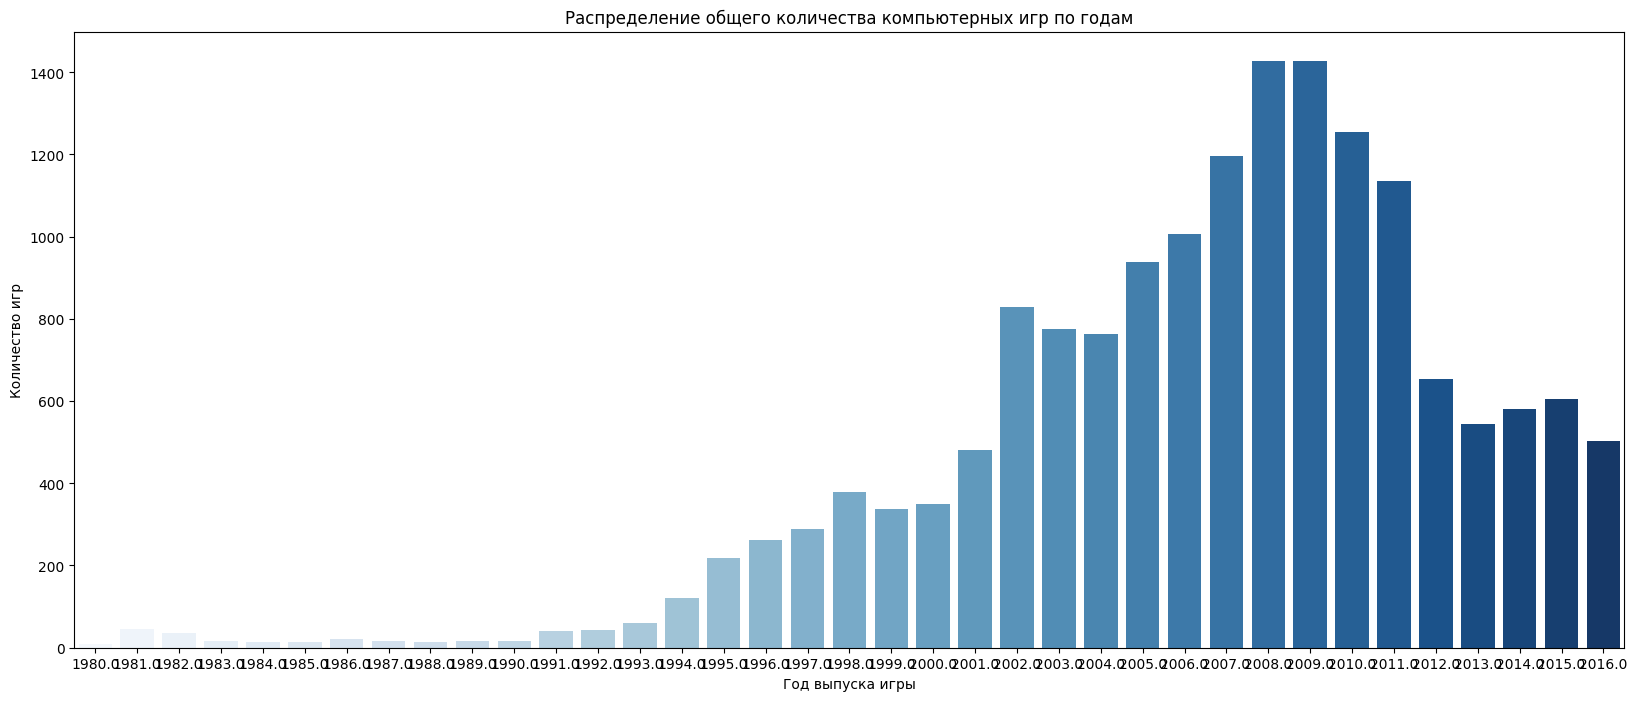

In [406]:
#Построим столбчатую диаграмму 
plt.figure(figsize=(20, 8))
df = sb.barplot(data= group_year, 
           x='year_of_release', y='number_of_games', 
           palette = 'Blues')
df.set(xlabel='Год выпуска игры', 
       ylabel='Количество игр',  
       title='Распределение общего количества компьютерных игр по годам')
plt.show()

**Промежуточный вывод:** Наибольшее количество игр было выпущено в 2008 и 2009 годах. 

### Распределение объёма продаж игр на разных платформах по годам
* Посмотрите, как менялись продажи по платформам. 
* Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
* За какой характерный срок появляются новые и исчезают старые платформы?

In [407]:
# Сгруппируем данные общих продаж и платформы
group_platform_sales = data.groupby('platform', as_index=False).total_sales.sum()\
            .sort_values(by='total_sales', ascending=False)
group_platform_sales.head()

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


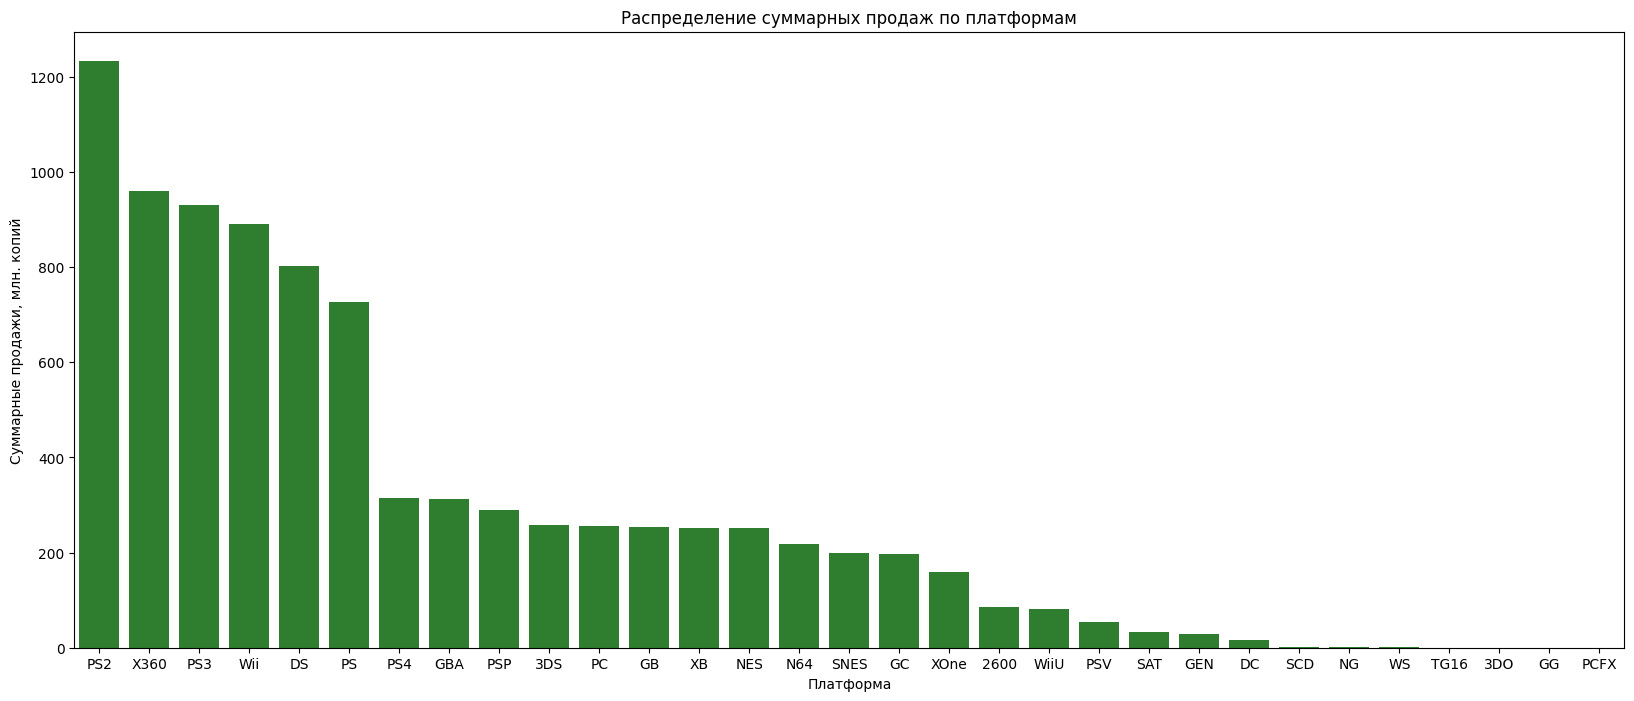

In [408]:
#Построим столбчатую диаграмму распределение суммарных продаж по платформам
plt.figure(figsize=(20, 8))
df = sb.barplot(data= group_platform_sales, 
           x='platform', y='total_sales', 
           color = 'forestgreen')
df.set(xlabel='Платформа', 
       ylabel='Суммарные продажи, млн. копий',  
       title='Распределение суммарных продаж по платформам')
plt.show()

In [409]:
group_platform_sales['total_sales'].describe()

count      31.000000
mean      284.334516
std       343.954144
min         0.030000
25%        22.150000
50%       200.040000
75%       301.205000
max      1233.560000
Name: total_sales, dtype: float64

(0.0, 1300.0)

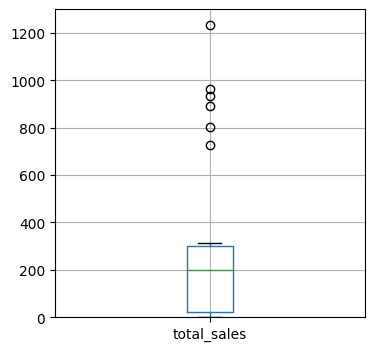

In [410]:
#Построим диаграмму размаха, чтобы более нагдядно увидеть данные из таблицы describe
group_platform_sales.boxplot(column='total_sales', figsize=(4, 4))
plt.ylim(0, 1300)

Для дальнейшего анализа отсортируем платформы, которые составляют половину от общего объема продаж (крупные игроки на рынке).

In [411]:
group_platform_sales_new = group_platform_sales.query('total_sales > total_sales.median()', inplace=False).reset_index(drop=True)

In [412]:
group_platform_sales_new

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [413]:
#Сгруппируем выбранные платформы по годам
group_platform_year = data.query('platform in @group_platform_sales_new.platform')\
    .groupby(['year_of_release','platform'], as_index=False).total_sales.sum()\
    .sort_values(by='total_sales', ascending=False)\
    .reset_index(drop=True)
group_platform_year.head()

,year_of_release,platform,total_sales
0,2004.0,PS2,211.81
1,2009.0,Wii,206.97
2,2002.0,PS2,205.38
3,2003.0,PS2,184.31
4,2008.0,Wii,171.32


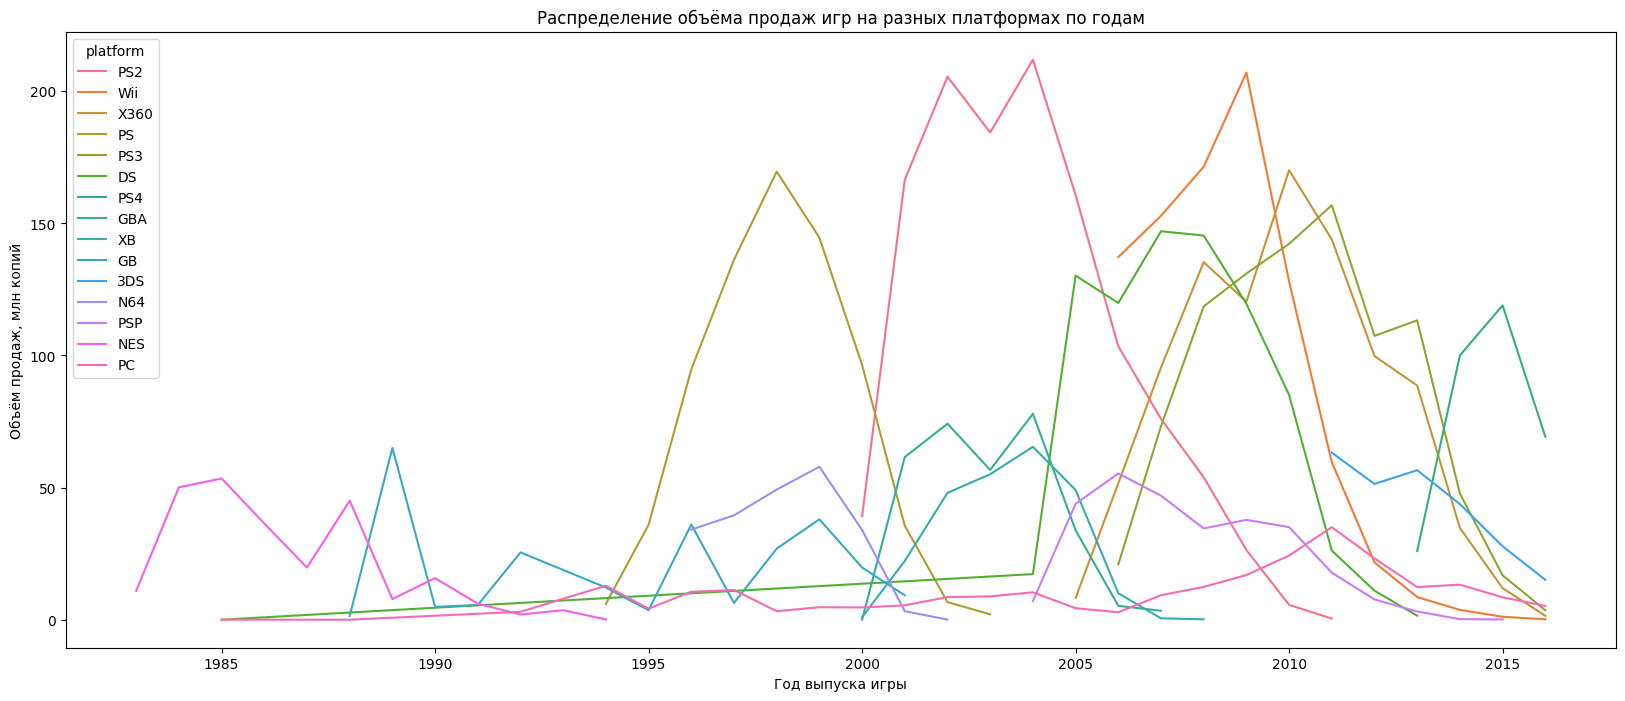

In [414]:
#Построим на одном графике для платформ из списка топ зависимость объема продаж игр от года выпуска
plt.figure(figsize=(20, 8))
df = sb.lineplot(data= group_platform_year, 
           x='year_of_release', y='total_sales', hue='platform')
df.set(xlabel='Год выпуска игры', 
       ylabel='Объём продаж, млн копий',  
       title='Распределение объёма продаж игр на разных платформах по годам')
plt.show()

In [415]:
#Добавим столбцы с продолжительностью жизни платформ
group_platform_life = data.groupby('platform', as_index=False).year_of_release.agg(['min','max'])\
    .rename(columns={'min' : 'first_year','max' : 'last_year'})
group_platform_life['life_length'] = group_platform_life['last_year'] - group_platform_life['first_year']
group_platform_life.sort_values(by='life_length', ascending=False, inplace=True)
group_platform_life.head()

,first_year,last_year,life_length
platform,,,
PC,1985.0,2016.0,31.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
X360,2005.0,2016.0,11.0
PSP,2004.0,2015.0,11.0


In [416]:
group_platform_life['life_length'].describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: life_length, dtype: float64

(0.0, 32.0)

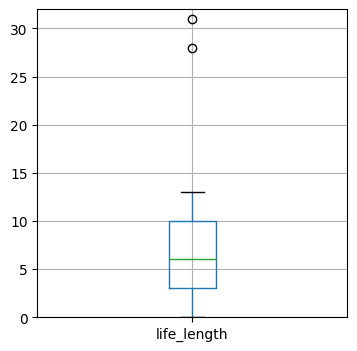

In [417]:
#Построим диаграмму размаха, чтобы более нагдядно увидеть данные из таблицы describe 
#и определить медианный жизненный цикл платформ
group_platform_life.boxplot(column='life_length', figsize=(4, 4))
plt.ylim(0, 32)

**Промежуточный вывод:** Из графика объема продаж по платформам видно, что самый большой объем продаж стоит за платформой PS2, однако из графика распределения объёма продаж игр на разных платформах по годам видно, что пик продаж игр на этой платформе приходился на 2002-2005 года. Определили жизненный цикл платформ, диаграмма разамаха показала, что медианным значением является 6 лет. Но есть и исключения - платформа PC к 2016 году существовала уже 31 год (персональный компьютер, что собственно логично).

### Распределение объёма продаж игр на разных платформах за выбранный период. Выбор лидеров продаж.
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Исходя из полученного среднего жизненного цикла платформ (6 лет) ясно, что не стоит брать весь период выборки для построения прогноза на 2017 год. Какие то платформ уже прошли пик популярности, какие то только появляются на рынке, а какие то уже отработали свой жизненный цикл. Предполагаю, что стоит рассматривать период за последние 3-4 года (пол жизненного цикла платформы). Тогда в это период попадут платформы, которые только появляются на рынке и платформы, которые сейчас популярны.

In [418]:
# Сгруппируем платформы за последние 3 года и посчитаем общий объем продаж для каждой
group_platform_three_year = data.query('year_of_release > 2013')\
    .groupby(['year_of_release','platform'], as_index=False).total_sales.sum()\
    .sort_values(by='total_sales', ascending=False)\
    .reset_index(drop=True)
group_platform_three_year.head(10)

,year_of_release,platform,total_sales
0,2015.0,PS4,118.90
1,2014.0,PS4,100.00
2,2016.0,PS4,69.25
3,2015.0,XOne,60.14
4,2014.0,XOne,54.07
5,2014.0,PS3,47.76
6,2014.0,3DS,43.76
7,2014.0,X360,34.74
8,2015.0,3DS,27.78
9,2016.0,XOne,26.15


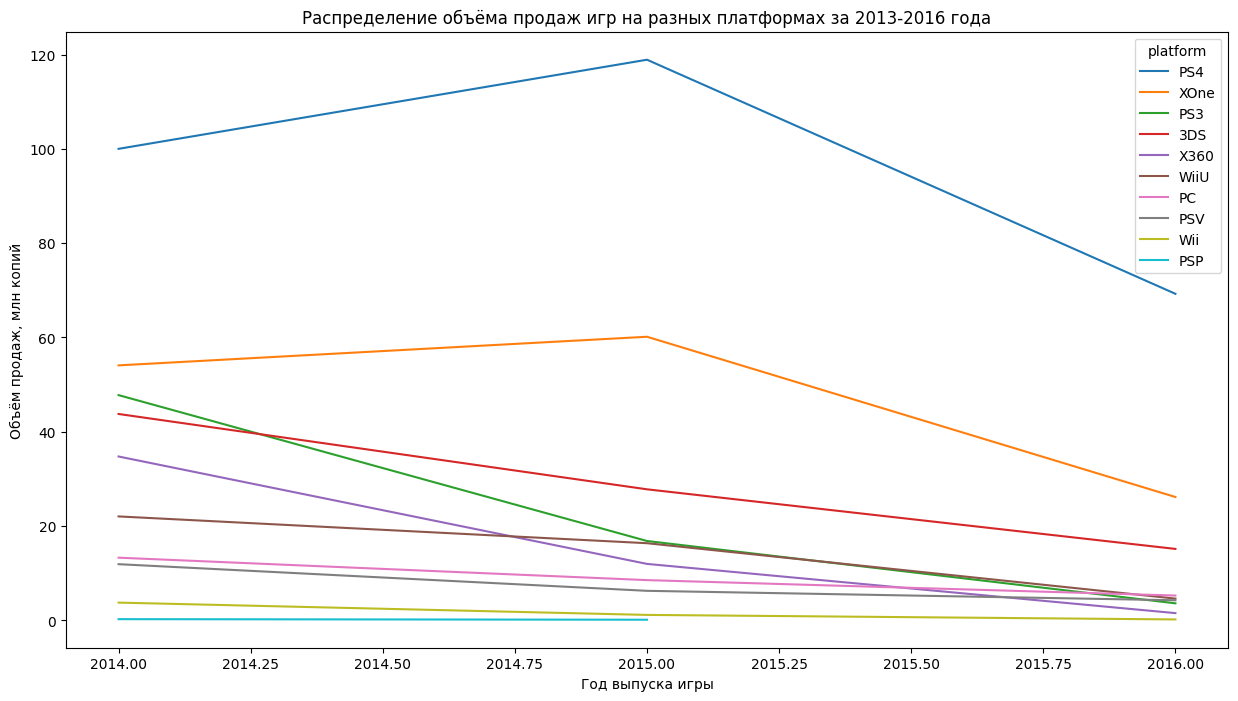

In [419]:
#Построим на одном графике для платформ зависимость объема продаж игр от года выпуска в период с 2013-2016
plt.figure(figsize=(15, 8))
df = sb.lineplot(data= group_platform_three_year, 
           x='year_of_release', y='total_sales', hue='platform')
df.set(xlabel='Год выпуска игры', 
       ylabel='Объём продаж, млн копий',  
       title='Распределение объёма продаж игр на разных платформах за 2013-2016 года')
plt.show()

**Промежуточный вывод:** Из последнего графика видно, что продажи по всем платформам падают, однако можно выбрать тройку платформ, продажи для которых выше, чем у остальных и две платформ, которые в ближайшие три года были популярны. Таким образом оставим для дальнейшего исследования платформы 3DS, XOne, PS4(лидер), PS3 и X360.

### Диаграмма размаха для платформ 
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [420]:
#Сделаем срез таблицы по нужным нам платформам
platform_lider_three_year = data.query("(platform in ['3DS','XOne','PS4','PS3','X360'])&(year_of_release>2013)")
platform_lider_three_year.groupby('platform').total_sales.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


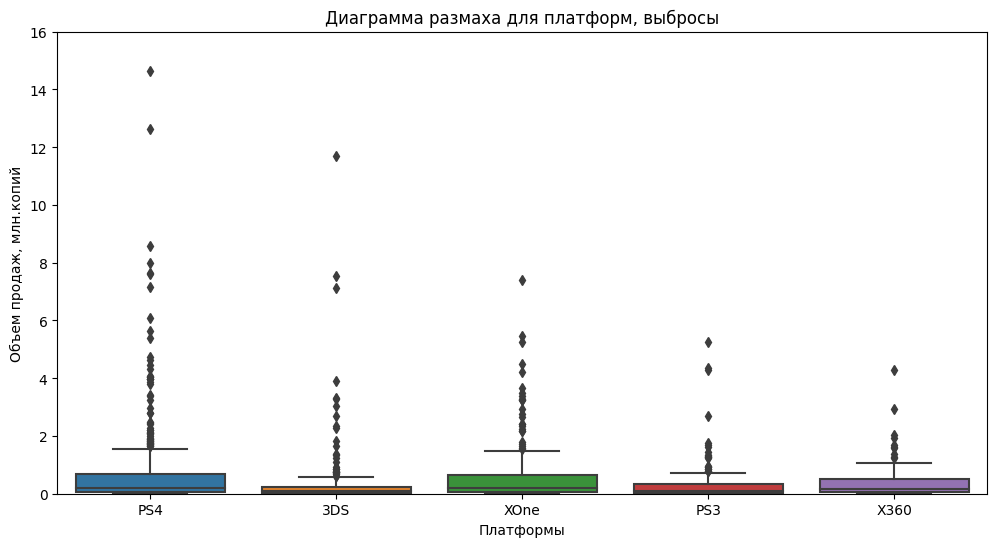

In [421]:
#Посмотрим выбросы
plt.figure(figsize=(12,6))
df = sb.boxplot(data=platform_lider_three_year, x='platform', y='total_sales')
df.set(title='Диаграмма размаха для платформ, выбросы', xlabel='Платформы', 
       ylabel='Объем продаж, млн.копий', ylim=(0,16))
plt.show()

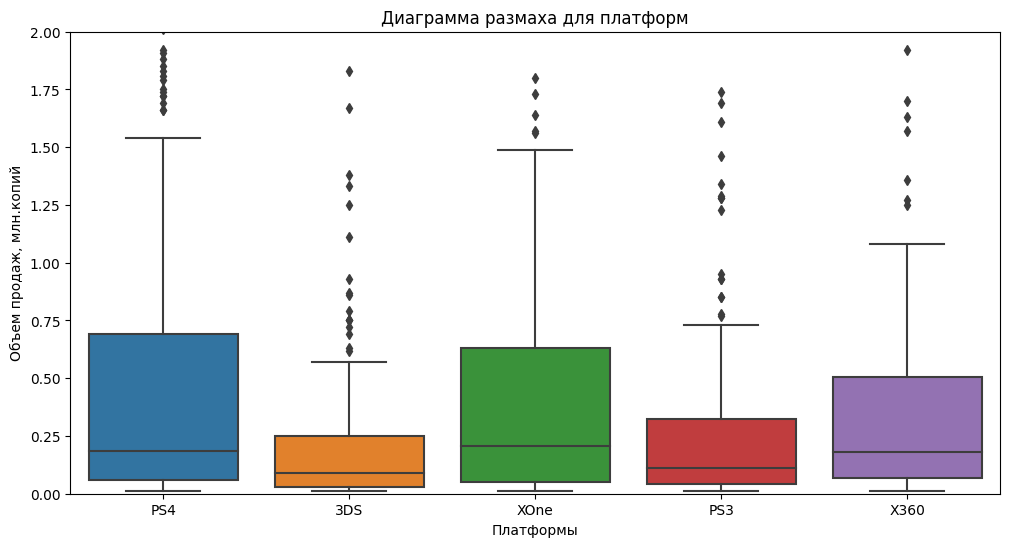

In [422]:
plt.figure(figsize=(12,6))
df = sb.boxplot(data=platform_lider_three_year, x='platform', y='total_sales')
df.set(title='Диаграмма размаха для платформ', xlabel='Платформы', 
       ylabel='Объем продаж, млн.копий', ylim=(0,2))
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Правильно, что построила диаграмму с выбросами и масштабированную.
</div>

In [423]:
#Посмотрим, продажа каких игр принесла самый большой доход, выведем топ-10
game_lider = data.query('year_of_release > 2013').sort_values(by='total_sales', ascending=False)
game_lider.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,is_absent,False,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,False,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,is_absent,False,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,False,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,is_absent,False,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,False,7.66
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,False,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,is_absent,False,7.55
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,is_absent,False,7.39
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,False,7.17


**Промежуточный вывод:** Среднее значение продаж для всех платформ сравнимое, однако на диграмме размаха видны выбросы (большое количество для всех платформ) - отдельные игры, которые стали очень популярными, они и дают основной объем продаж.

### Диаграммы рассеяния и коэффициенты корреляции между отзывами и продажами
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.

#### Для платформы PS4

In [424]:
#Сделаем срез таблицы по нужной нам платформе PS4
platform_PS4 = data.query("(platform in 'PS4')&(year_of_release>2013)")

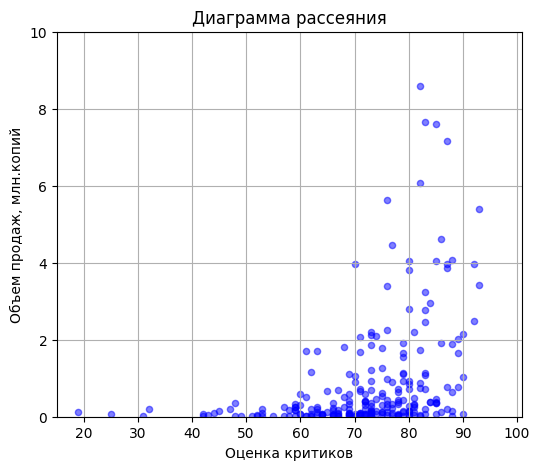

In [425]:
# Диаграмма рассеяния оценки критиков
df = platform_PS4.plot(x='critic_score', y='total_sales', 
                                  kind='scatter', grid=True, color='blue',
                                  alpha=0.5,figsize=(6,5))
df.set(title='Диаграмма рассеяния', xlabel='Оценка критиков', 
       ylabel='Объем продаж, млн.копий', ylim=(0,10))
plt.show()

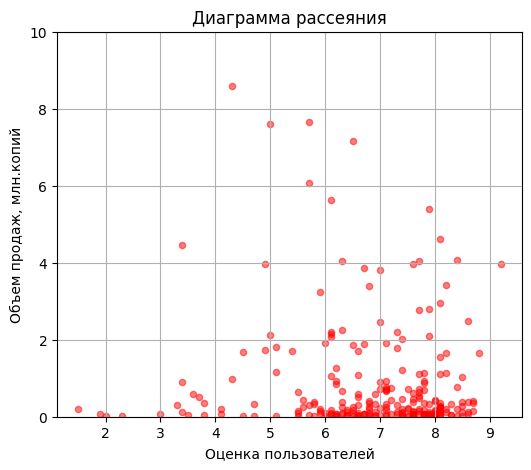

In [426]:
# Диаграмма рассеяния оценки пользователей
df = platform_PS4.plot(x='user_score', y='total_sales', 
                                  kind='scatter', grid=True, color='red',
                                  alpha=0.5,figsize=(6,5))
df.set(title='Диаграмма рассеяния', xlabel='Оценка пользователей', 
       ylabel='Объем продаж, млн.копий', ylim=(0,10))
plt.show()

In [427]:
#Коэффициент корреляции общих продаж и оценки пользователей
platform_PS4['user_score'].corr(platform_PS4['total_sales'])

-0.040131589472697266

In [428]:
#Коэффициент корреляции общих продаж и оценки критиков
platform_PS4['critic_score'].corr(platform_PS4['total_sales'])

0.4026614106810408

#### Для платформы 3DS

In [429]:
#Сделаем срез таблицы по нужной нам платформе 3DS
platform_3DS = data.query("(platform in '3DS')&(year_of_release>2013)")

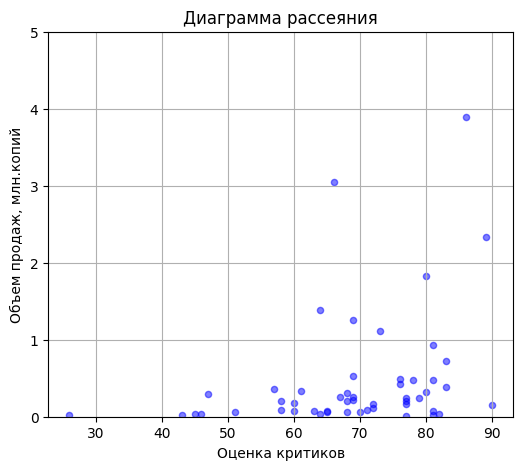

In [430]:
# Диаграмма рассеяния оценки критиков
df = platform_3DS.plot(x='critic_score', y='total_sales', 
                                  kind='scatter', grid=True, color='blue',
                                  alpha=0.5,figsize=(6,5))
df.set(title='Диаграмма рассеяния', xlabel='Оценка критиков', 
       ylabel='Объем продаж, млн.копий', ylim=(0,5))
plt.show()

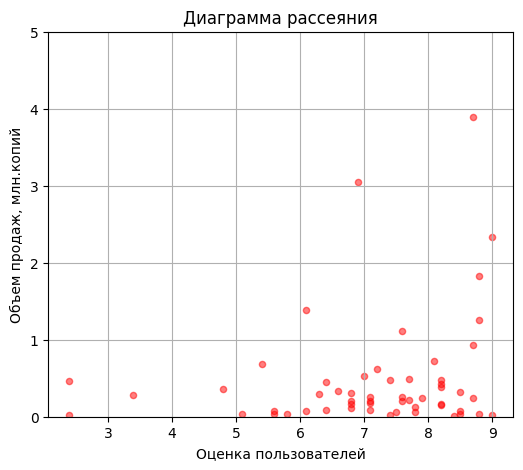

In [431]:
# Диаграмма рассеяния оценки пользователей
df = platform_3DS.plot(x='user_score', y='total_sales', 
                                  kind='scatter', grid=True, color='red',
                                  alpha=0.5,figsize=(6,5))
df.set(title='Диаграмма рассеяния', xlabel='Оценка пользователей', 
       ylabel='Объем продаж, млн.копий', ylim=(0,5))
plt.show()

In [432]:
#Коэффициент корреляции общих продаж и оценки пользователей
platform_3DS['user_score'].corr(platform_3DS['total_sales'])

0.2151932718527028

In [433]:
#Коэффициент корреляции общих продаж и оценки критиков
platform_3DS['critic_score'].corr(platform_3DS['total_sales'])

0.31411749286905094

#### Для платформы XOne

In [434]:
#Сделаем срез таблицы по нужной нам платформе XOne
platform_XOne = data.query("(platform in 'XOne')&(year_of_release>2013)")

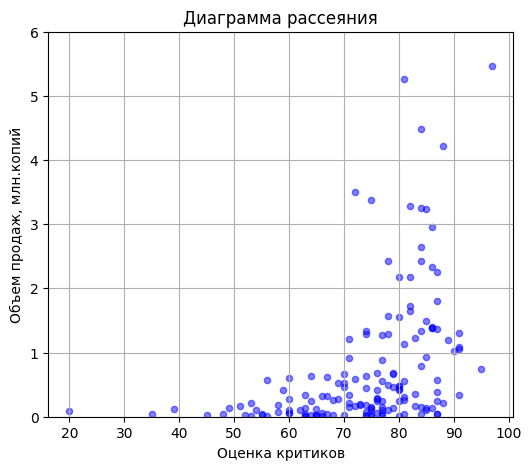

In [435]:
# Диаграмма рассеяния оценки критиков
df = platform_XOne.plot(x='critic_score', y='total_sales', 
                                  kind='scatter', grid=True, color='blue',
                                  alpha=0.5,figsize=(6,5))
df.set(title='Диаграмма рассеяния', xlabel='Оценка критиков', 
       ylabel='Объем продаж, млн.копий', ylim=(0,6))
plt.show()

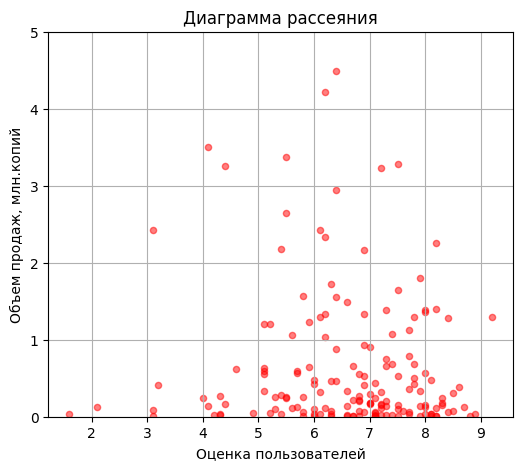

In [436]:
# Диаграмма рассеяния оценки пользователей
df = platform_XOne.plot(x='user_score', y='total_sales', 
                                  kind='scatter', grid=True, color='red',
                                  alpha=0.5,figsize=(6,5))
df.set(title='Диаграмма рассеяния', xlabel='Оценка пользователей', 
       ylabel='Объем продаж, млн.копий', ylim=(0,5))
plt.show()

In [437]:
#Коэффициент корреляции общих продаж и оценки пользователей
platform_XOne['user_score'].corr(platform_XOne['total_sales'])

-0.0703839280647581

In [438]:
#Коэффициент корреляции общих продаж и оценки критиков
platform_XOne['critic_score'].corr(platform_XOne['total_sales'])

0.4286769437033318

#### Для платформы PS3

In [439]:
#Сделаем срез таблицы по нужной нам платформе PS3
platform_PS3 = data.query("(platform in 'PS3')&(year_of_release>2013)")

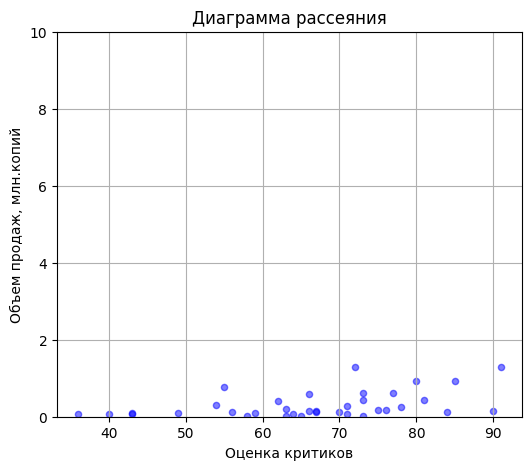

In [440]:
# Диаграмма рассеяния оценки критиков
df = platform_PS3.plot(x='critic_score', y='total_sales', 
                                  kind='scatter', grid=True, color='blue',
                                  alpha=0.5,figsize=(6,5))
df.set(title='Диаграмма рассеяния', xlabel='Оценка критиков', 
       ylabel='Объем продаж, млн.копий', ylim=(0,10))
plt.show()

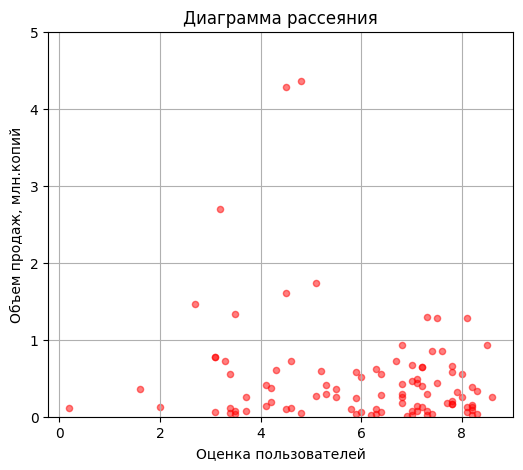

In [441]:
# Диаграмма рассеяния оценки пользователей
df = platform_PS3.plot(x='user_score', y='total_sales', 
                                  kind='scatter', grid=True, color='red',
                                  alpha=0.5,figsize=(6,5))
df.set(title='Диаграмма рассеяния', xlabel='Оценка пользователей', 
       ylabel='Объем продаж, млн.копий', ylim=(0,5))
plt.show()

In [442]:
#Коэффициент корреляции общих продаж и оценки пользователей
platform_PS3['user_score'].corr(platform_PS3['total_sales'])

-0.16676141347662105

In [443]:
#Коэффициент корреляции общих продаж и оценки критиков
platform_PS3['critic_score'].corr(platform_PS3['total_sales'])

0.44657460493190715

#### Для платформы X360

In [444]:
#Сделаем срез таблицы по нужной нам платформе X360
platform_X360 = data.query("(platform in 'X360')&(year_of_release>2013)")

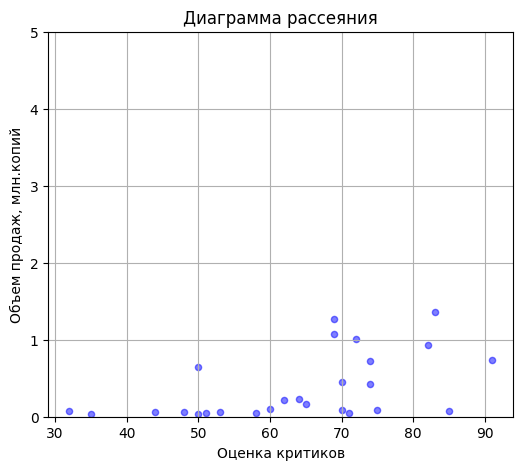

In [445]:
# Диаграмма рассеяния оценки критиков
df = platform_X360.plot(x='critic_score', y='total_sales', 
                                  kind='scatter', grid=True, color='blue',
                                  alpha=0.5,figsize=(6,5))
df.set(title='Диаграмма рассеяния', xlabel='Оценка критиков', 
       ylabel='Объем продаж, млн.копий', ylim=(0,5))
plt.show()

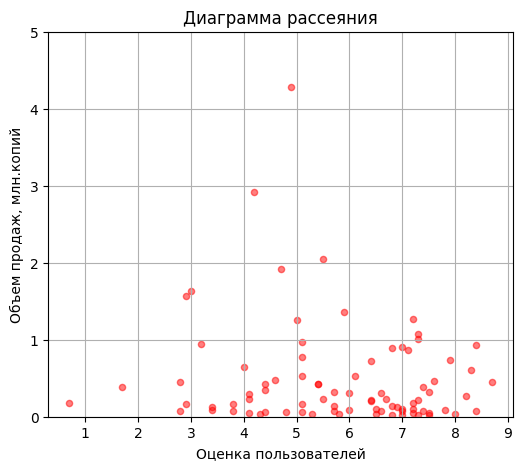

In [446]:
# Диаграмма рассеяния оценки пользователей
df = platform_X360.plot(x='user_score', y='total_sales', 
                                  kind='scatter', grid=True, color='red',
                                  alpha=0.5,figsize=(6,5))
df.set(title='Диаграмма рассеяния', xlabel='Оценка пользователей', 
       ylabel='Объем продаж, млн.копий', ylim=(0,5))
plt.show()

In [447]:
#Коэффициент корреляции общих продаж и оценки пользователей
platform_X360['user_score'].corr(platform_X360['total_sales'])

-0.13844457094566506

In [448]:
#Коэффициент корреляции общих продаж и оценки критиков
platform_X360['critic_score'].corr(platform_X360['total_sales'])

0.5257228356581523

**Промежуточный вывод:** Для всех платформ корреляция между объемами продаж и оценками критиков находится в диапазоне от 0.31 до 0.41, что говорит о не большой зависимости этих показателей. Корреляция между оценками пользователей и объемом продаж практически нулевая, что говорит о полной независимости этих показателей.

### Распределение общего количества игр по жанрам, распределение объема продаж по жанрам игр.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [449]:
# Сгруппируем данные общих продаж и платформы
group_genre_sales = data.groupby('genre', as_index=False).total_sales.sum()\
            .sort_values(by='total_sales', ascending=False)\
            .reset_index(drop=True)
group_genre_sales

,genre,total_sales
0,Action,1716.52
1,Sports,1309.67
2,Shooter,1041.36
3,Role-Playing,931.08
4,Platform,825.55
5,Misc,790.29
6,Racing,723.49
7,Fighting,442.66
8,Simulation,387.96
9,Puzzle,239.89


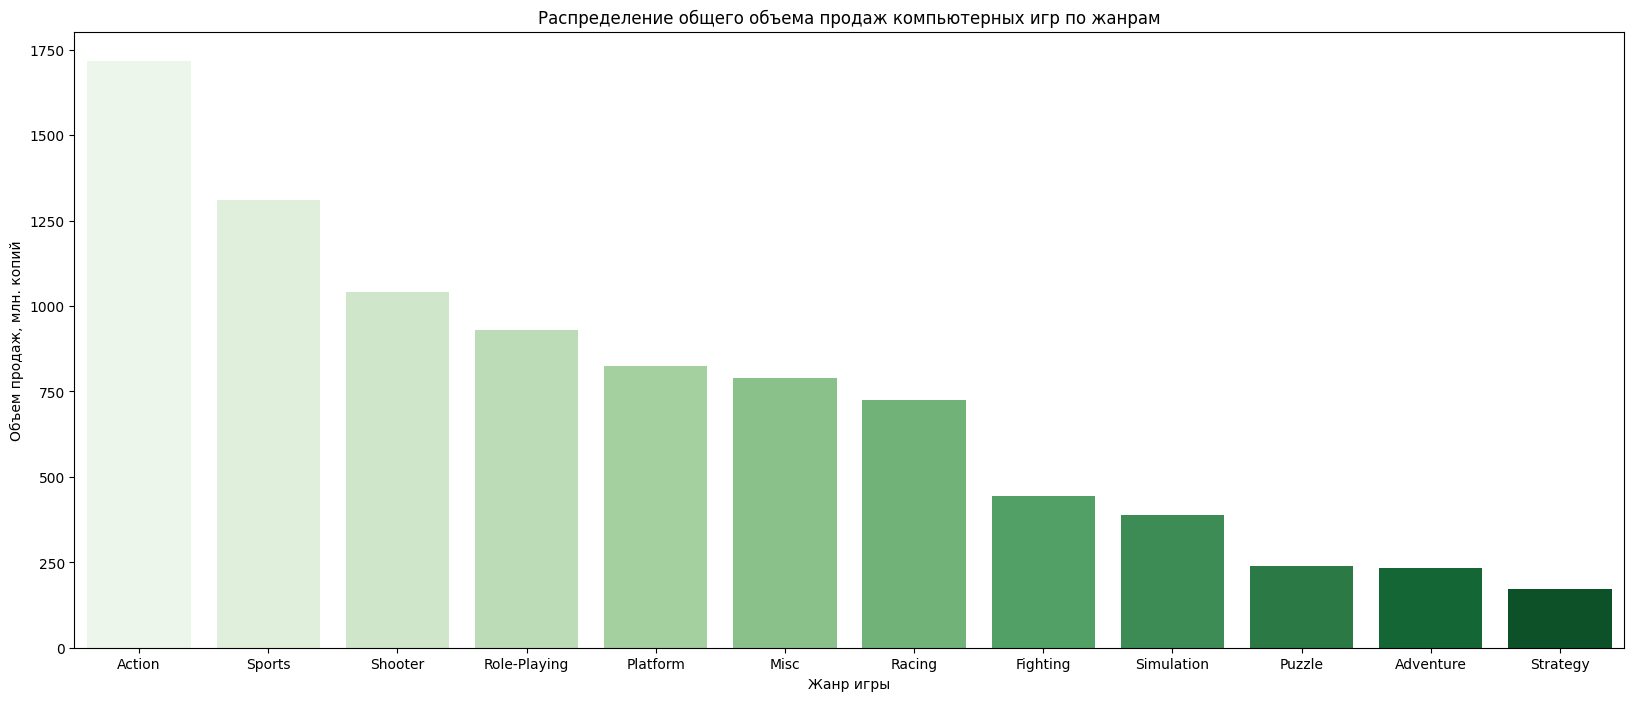

In [450]:
#Построим столбчатую диаграмму 
plt.figure(figsize=(20, 8))
df = sb.barplot(data= group_genre_sales, 
           x='genre', y='total_sales', 
           palette = 'Greens')
df.set(xlabel='Жанр игры', 
       ylabel='Объем продаж, млн. копий',  
       title='Распределение общего объема продаж компьютерных игр по жанрам')
plt.show()

In [451]:
#Сгруппируем таблицу по жанрам и продажам и выведем описательные характеристики
platform_lider_three_year.groupby('genre').total_sales.describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,422.0,0.415095,0.943221,0.01,0.04,0.115,0.4000,12.62
Adventure,95.0,0.152316,0.269844,0.01,0.02,0.060,0.1350,1.66
Fighting,49.0,0.439796,1.138717,0.01,0.07,0.130,0.3200,7.55
Misc,75.0,0.350933,0.829520,0.01,0.03,0.110,0.3200,5.27
Platform,26.0,0.421923,0.587687,0.01,0.09,0.145,0.3400,1.91
Puzzle,9.0,0.103333,0.145774,0.01,0.03,0.060,0.1100,0.48
Racing,52.0,0.378654,0.566081,0.01,0.05,0.125,0.3875,2.42
Role-Playing,140.0,0.635357,1.441816,0.01,0.06,0.165,0.5750,11.68
Shooter,103.0,1.550291,2.196580,0.01,0.25,0.680,1.9200,14.63


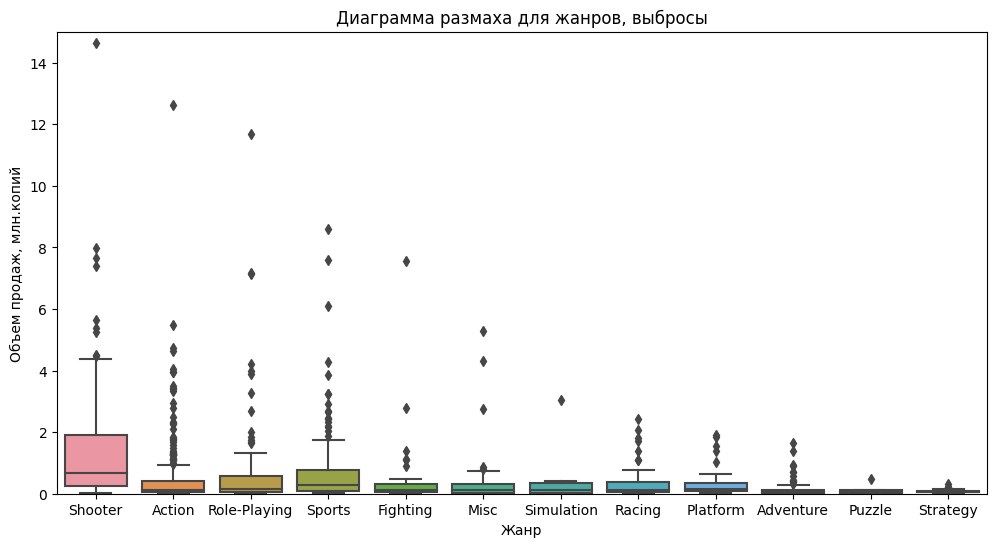

In [452]:
#Посмотрим выбросы
plt.figure(figsize=(12,6))
df = sb.boxplot(data=platform_lider_three_year, x='genre', y='total_sales')
df.set(title='Диаграмма размаха для жанров, выбросы', xlabel='Жанр', 
       ylabel='Объем продаж, млн.копий', ylim=(0,15))
plt.show()

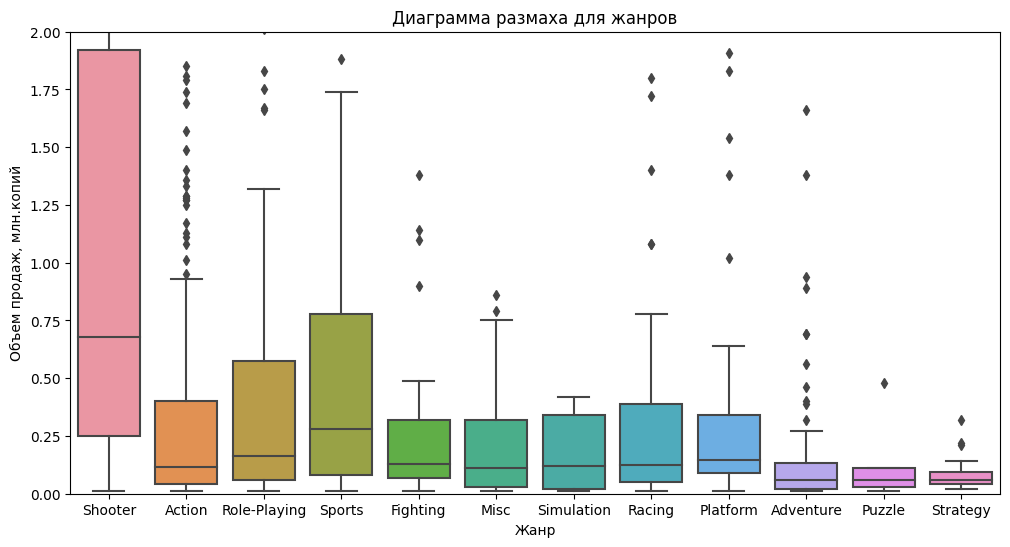

In [453]:
#Посмотрим медианные значения
plt.figure(figsize=(12,6))
df = sb.boxplot(data=platform_lider_three_year, x='genre', y='total_sales')
df.set(title='Диаграмма размаха для жанров', xlabel='Жанр', 
       ylabel='Объем продаж, млн.копий', ylim=(0,2))
plt.show()

In [454]:
# Посмотри популярные игры с жанром Action
game_action = platform_lider_three_year.query("genre == 'Action'").sort_values(by='total_sales', ascending=False)\
                            .reset_index(drop=True)
game_action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
0,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,False,12.62
1,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,False,5.47
2,The Last of Us,PS4,2014.0,Action,1.88,2.00,0.07,0.77,NaN,NaN,is_absent,False,4.72
3,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,False,4.62
4,Watch Dogs,PS4,2014.0,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,False,4.05


**Промежуточный вывод:** Согласно диаграмме размаха, жанр с самыми большими средним и медианным занчениями продаж является Shooter, второй - Sports. Жанры с самым маленьким медианным значением - Strategy, Adventure и Puzzle. Таким образом если соотнести результаты диаграммы размаха и графика распределение общего объема продаж компьютерных игр по жанрам, можно сделать вывод, что основной доход от продаж видео игр с жанром Action и Sports приносят отдельные игры (например хит продаж - игра Grand Theft Auto V). 

## Портрет пользователя каждого региона
* Определите для пользователя каждого региона (NA, EU, JP):
  * Самые популярные платформы (топ-5). Опишите различия в долях продаж.
  * Самые популярные жанры (топ-5). Поясните разницу.
  * Влияет ли рейтинг ESRB на продажи в отдельном регионе?



### Портрет пользователя NA регион

In [455]:
# Сгруппируем данные общих продаж в регионе NA и платформы
data_na = platform_lider_three_year.groupby('platform', as_index=False).na_sales.sum()\
    .sort_values(by='na_sales', ascending=False).reset_index(drop=True)
data_na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


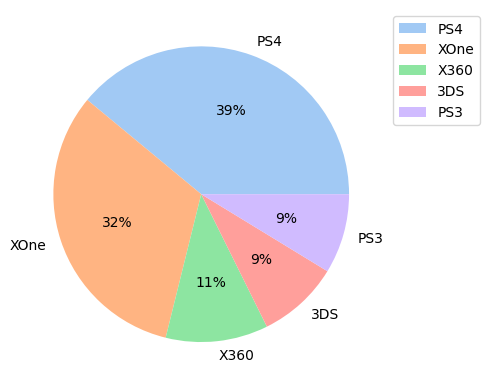

In [456]:
#Диаграмма процентного соотношения продаж по платформам для региона NA
colors = sb.color_palette('pastel')[ 0:5 ]
plt.pie(data_na['na_sales'], labels = data_na['platform'], colors = colors, autopct='%.0f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [457]:
# Сгруппируем данные общих продаж в регионе NA и жанр
data_na_genre = platform_lider_three_year.groupby('genre', as_index=False).na_sales.sum()\
    .sort_values(by='na_sales', ascending=False).reset_index(drop=True)
data_na_genre.head()

,genre,na_sales
0,Shooter,75.10
1,Action,64.87
2,Sports,45.41
3,Role-Playing,30.46
4,Misc,11.19


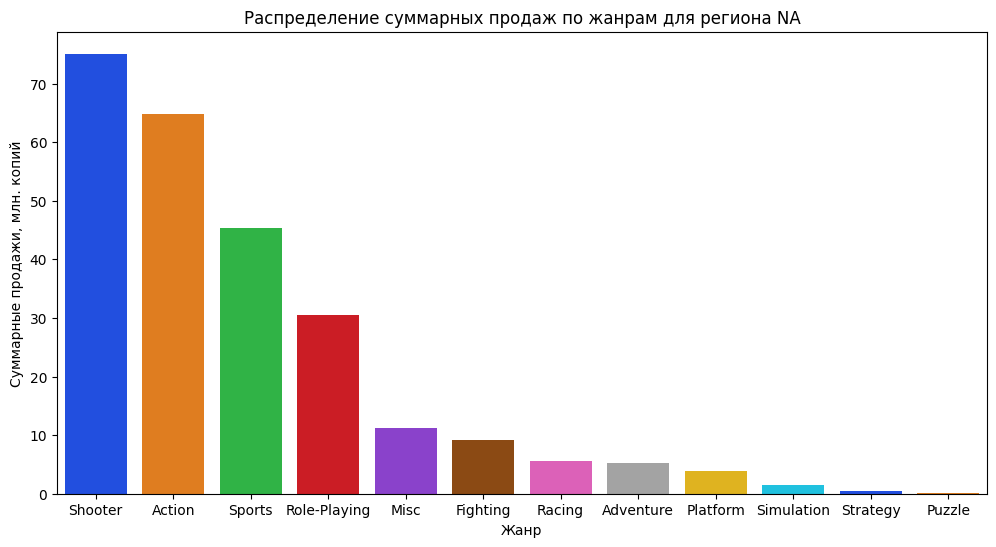

In [458]:
#Построим столбчатую диаграмму распределение суммарных продаж по жанрам для региона NA
plt.figure(figsize=(12, 6))
df = sb.barplot(data= data_na_genre, 
           x='genre', y='na_sales', palette ='bright')
df.set(xlabel='Жанр', 
       ylabel='Суммарные продажи, млн. копий',  
       title='Распределение суммарных продаж по жанрам для региона NA')
plt.show()

In [459]:
# Сгруппируем данные общих продаж в регионе NA и Rating
data_na_rating = platform_lider_three_year.groupby('rating', as_index=False).na_sales.sum()\
    .sort_values(by='na_sales', ascending=False).reset_index(drop=True)
data_na_rating

,rating,na_sales
0,M,90.82
1,is_absent,59.98
2,E,42.38
3,T,34.41
4,E10+,25.28


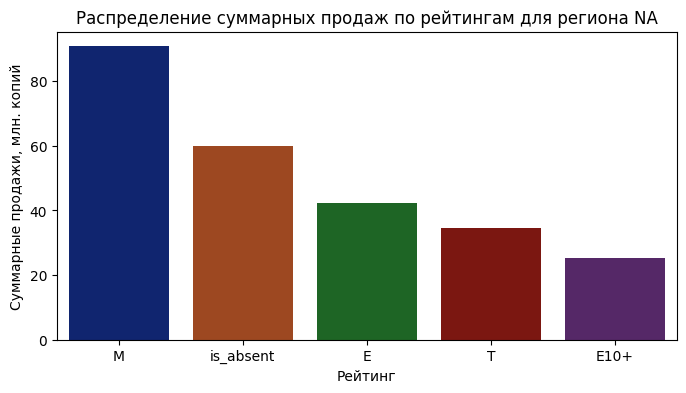

In [460]:
#Построим столбчатую диаграмму распределение суммарных продаж по рейтингу для региона NA
plt.figure(figsize=(8, 4))
df = sb.barplot(data= data_na_rating, 
           x='rating', y='na_sales', palette ='dark')
df.set(xlabel='Рейтинг', 
       ylabel='Суммарные продажи, млн. копий',  
       title='Распределение суммарных продаж по рейтингам для региона NA')
plt.show()

**Промежуточный вывод:** В данном регионе продажи разделились достаточно равномерно между платформами из топ-5. С небольшим преимуществом преобладает платформа PS4. В топ-5 входят игры с жанром Action, Shooter, Sports, Role-Playing	и Misc. Распределение суммарных продаж по рейтингам показывает, что в основном преобладают продажи игр с рейтингом M (для взрослых), на втором месте игры с неопределенным рейтингом, на третьем месте рейтинг Е (для всех).

### Портрет пользователя EU регион

In [461]:
# Сгруппируем данные общих продаж в регионе EU и платформы
data_eu = platform_lider_three_year.groupby('platform', as_index=False).eu_sales.sum()\
    .sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
data_eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,3DS,16.12
4,X360,15.49


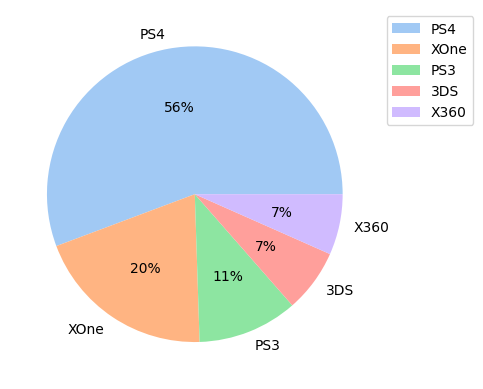

In [462]:
#Зададим цветовую гамму для круговой диаграммы и построим ее
colors = sb.color_palette('pastel')[ 0:5 ]
plt.pie(data_eu['eu_sales'], labels = data_eu['platform'], colors = colors, autopct='%.0f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show() 

In [463]:
# Сгруппируем данные общих продаж в регионе EU и жанр
data_eu_genre = platform_lider_three_year.groupby('genre', as_index=False).eu_sales.sum()\
    .sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
data_eu_genre.head()

,genre,eu_sales
0,Action,65.79
1,Shooter,60.59
2,Sports,43.88
3,Role-Playing,24.44
4,Racing,11.36


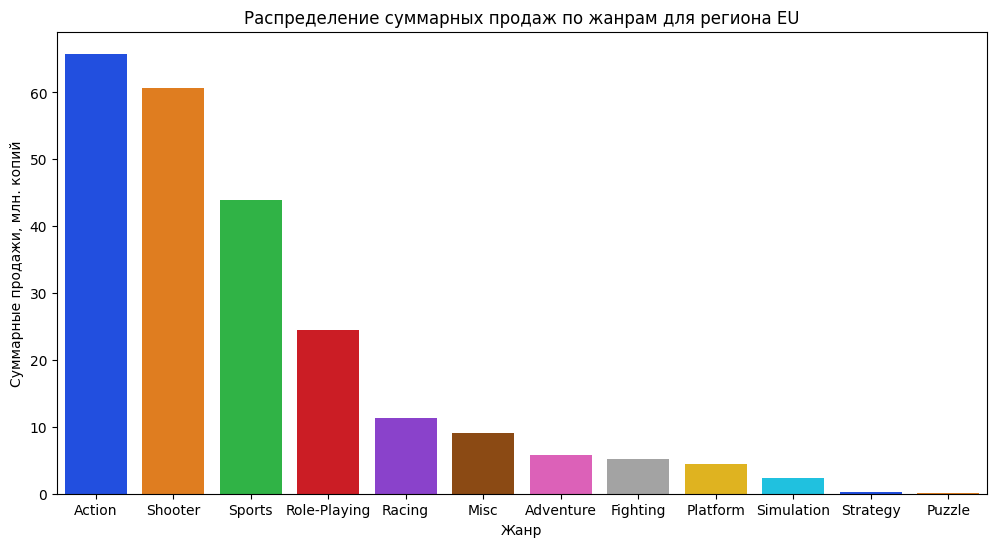

In [464]:
#Построим столбчатую диаграмму распределение суммарных продаж по жанрам для региона EU
plt.figure(figsize=(12, 6))
df = sb.barplot(data= data_eu_genre, 
           x='genre', y='eu_sales', palette ='bright')
df.set(xlabel='Жанр', 
       ylabel='Суммарные продажи, млн. копий',  
       title='Распределение суммарных продаж по жанрам для региона EU')
plt.show()

In [465]:
# Сгруппируем данные общих продаж в регионе EU и Rating
data_eu_rating = platform_lider_three_year.groupby('rating', as_index=False).eu_sales.sum()\
    .sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
data_eu_rating

,rating,eu_sales
0,M,85.02
1,is_absent,52.76
2,E,49.46
3,T,28.08
4,E10+,18.12


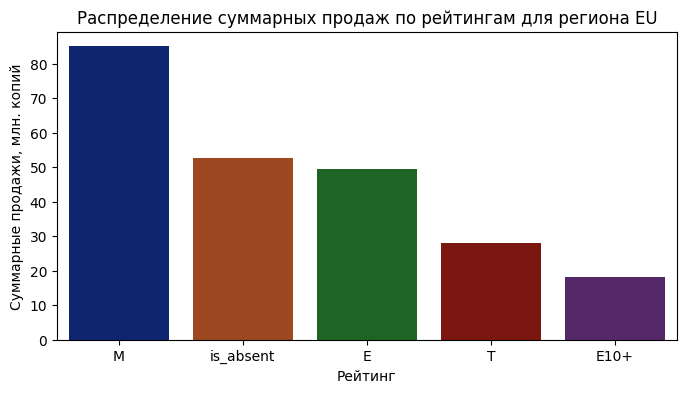

In [466]:
#Построим столбчатую диаграмму распределение суммарных продаж по рейтингу для региона EU
plt.figure(figsize=(8, 4))
df = sb.barplot(data= data_eu_rating, 
           x='rating', y='eu_sales', palette ='dark')
df.set(xlabel='Рейтинг', 
       ylabel='Суммарные продажи, млн. копий',  
       title='Распределение суммарных продаж по рейтингам для региона EU')
plt.show()

**Промежуточный вывод:** В Европейском регионе существенно преобладают продажи игр на плтформе PS4, самой не популярной из топ-5 является платформа 3DS. В топ-5 входят игры с жанром Action, Shooter, Sports, Role-Playing	и Racing. Распределение суммарных продаж по рейтингам показывает, что в основном преобладают продажи игр с рейтингом M (для взрослых), на втором месте игры с неопределенным рейтингом, на третьем месте рейтинг Е (для всех).

### Портрет пользователя JP регион

In [467]:
# Сгруппируем данные общих продаж в регионе JP и платформы
data_jp = platform_lider_three_year.groupby('platform', as_index=False).jp_sales.sum()\
    .sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
data_jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PS3,11.22
3,XOne,0.32
4,X360,0.08


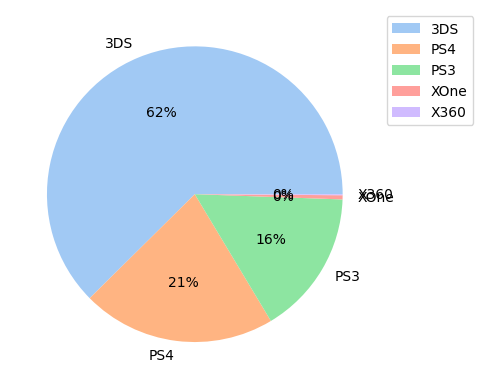

In [468]:
#Зададим цветовую гамму для круговой диаграммы и построим ее
colors = sb.color_palette('pastel')[ 0:5 ]
plt.pie(data_jp['jp_sales'], labels = data_jp['platform'], colors = colors, autopct='%.0f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show() 

In [469]:
# Сгруппируем данные общих продаж в регионе JP и жанр
data_jp_genre = platform_lider_three_year.groupby('genre', as_index=False).jp_sales.sum()\
    .sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
data_jp_genre.head()

,genre,jp_sales
0,Role-Playing,26.21
1,Action,23.79
2,Fighting,4.93
3,Shooter,3.33
4,Misc,2.90


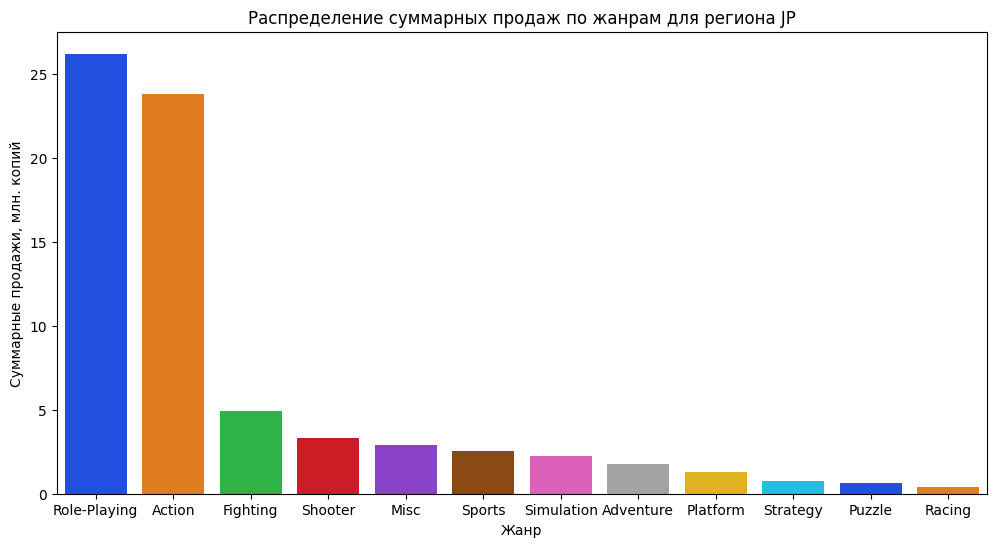

In [470]:
#Построим столбчатую диаграмму распределение суммарных продаж по жанрам для региона JP
plt.figure(figsize=(12, 6))
df = sb.barplot(data= data_jp_genre, 
           x='genre', y='jp_sales', palette ='bright')
df.set(xlabel='Жанр', 
       ylabel='Суммарные продажи, млн. копий',  
       title='Распределение суммарных продаж по жанрам для региона JP')
plt.show()

In [471]:
# Сгруппируем данные общих продаж в регионе JP и Rating
data_jp_rating = platform_lider_three_year.groupby('rating', as_index=False).jp_sales.sum()\
    .sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
data_jp_rating

,rating,jp_sales
0,is_absent,45.65
1,T,10.36
2,M,7.03
3,E,5.47
4,E10+,2.37


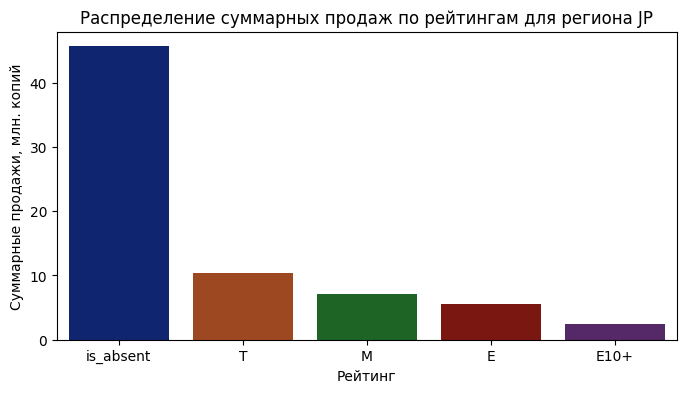

In [472]:
#Построим столбчатую диаграмму распределение суммарных продаж по рейтингу для региона JP
plt.figure(figsize=(8, 4))
df = sb.barplot(data= data_jp_rating, 
           x='rating', y='jp_sales', palette ='dark')
df.set(xlabel='Рейтинг', 
       ylabel='Суммарные продажи, млн. копий',  
       title='Распределение суммарных продаж по рейтингам для региона JP')
plt.show()

**Промежуточный вывод:** В Японии с большим преимуществом преобладают продажи игр на платформе 3DS, на второй строчке расположилась платформа PS3. Самыми не популярными из топ-5 оказались платформы X360 и XOne. В топ-5 входят игры с жанром Role-Playing, Action, Fighting, Shooter и Misc (то что не вошло в другие категории жанров). Согласно распределению суммарных продаж по рейтингам лидируют игры с неопределенным рейтингом (примерно в 4 раза больше),  на втором месте игры с рейтингом Т (для подростков), на третьем месте рейтинг М (для взрослых).

### Общие графики продаж для разных регионов 

In [473]:
# Сгруппируем данные по платформе и регионам, проссумируем продажи по регионам и применим функцию melt, 
#чтобы привести таблицу к удобному виду для построения общей диаграммы по регионам и платформам.
platform_region = platform_lider_three_year.groupby('platform', as_index=False)\
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})\
    .melt(id_vars=['platform'])\
    .rename(columns={'variable' : 'region', 'value' : 'total_sales'})\
    .sort_values('total_sales', ascending=False).reset_index(drop=True)
platform_region

,platform,region,total_sales
0,PS4,eu_sales,130.04
1,PS4,na_sales,98.61
2,XOne,na_sales,81.27
3,XOne,eu_sales,46.25
4,3DS,jp_sales,44.24
5,X360,na_sales,28.30
6,PS3,eu_sales,25.54
7,3DS,na_sales,22.64
8,PS3,na_sales,22.05
9,3DS,eu_sales,16.12


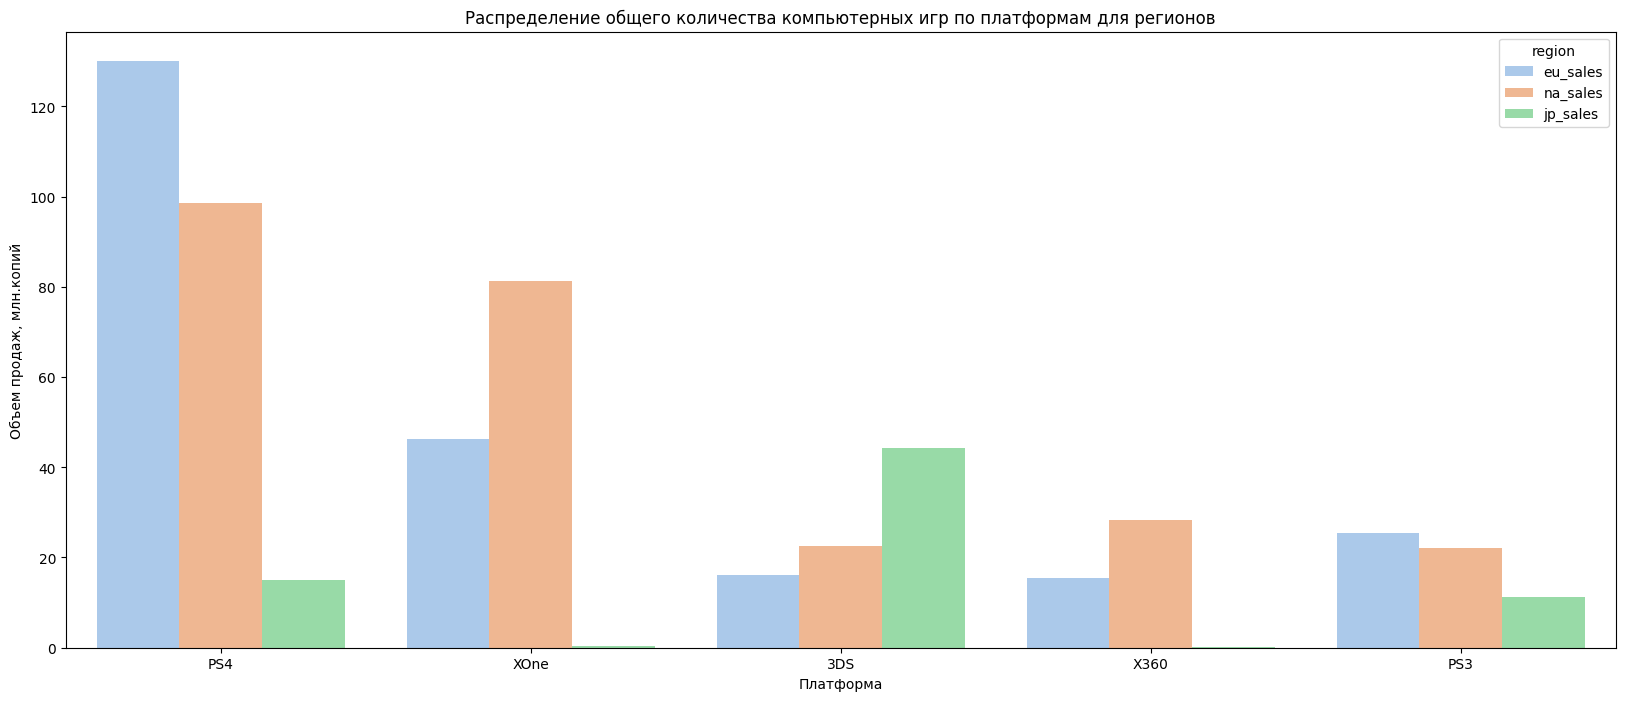

In [474]:
#Построим общую столбчатую диаграмму 
plt.figure(figsize=(20, 8))
df = sb.barplot(data= platform_region, 
           x='platform', y='total_sales', hue = 'region', palette = 'pastel')
df.set(xlabel='Платформа', 
       ylabel='Объем продаж, млн.копий', 
       title='Распределение общего количества компьютерных игр по платформам для регионов')
plt.show()

In [475]:
# Сгруппируем данные по жанрам и регионам, проссумируем продажи по регионам и применим функцию melt, 
# чтобы привести таблицу к удобному виду для построения общей диаграммы по регионам и платформам.
genre_region = platform_lider_three_year.groupby('genre', as_index=False)\
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})\
    .melt(id_vars=['genre'])\
    .rename(columns={'variable' : 'region', 'value' : 'total_sales'})\
    .sort_values('total_sales', ascending=False).reset_index(drop=True)
genre_region.head()

,genre,region,total_sales
0,Shooter,na_sales,75.10
1,Action,eu_sales,65.79
2,Action,na_sales,64.87
3,Shooter,eu_sales,60.59
4,Sports,na_sales,45.41


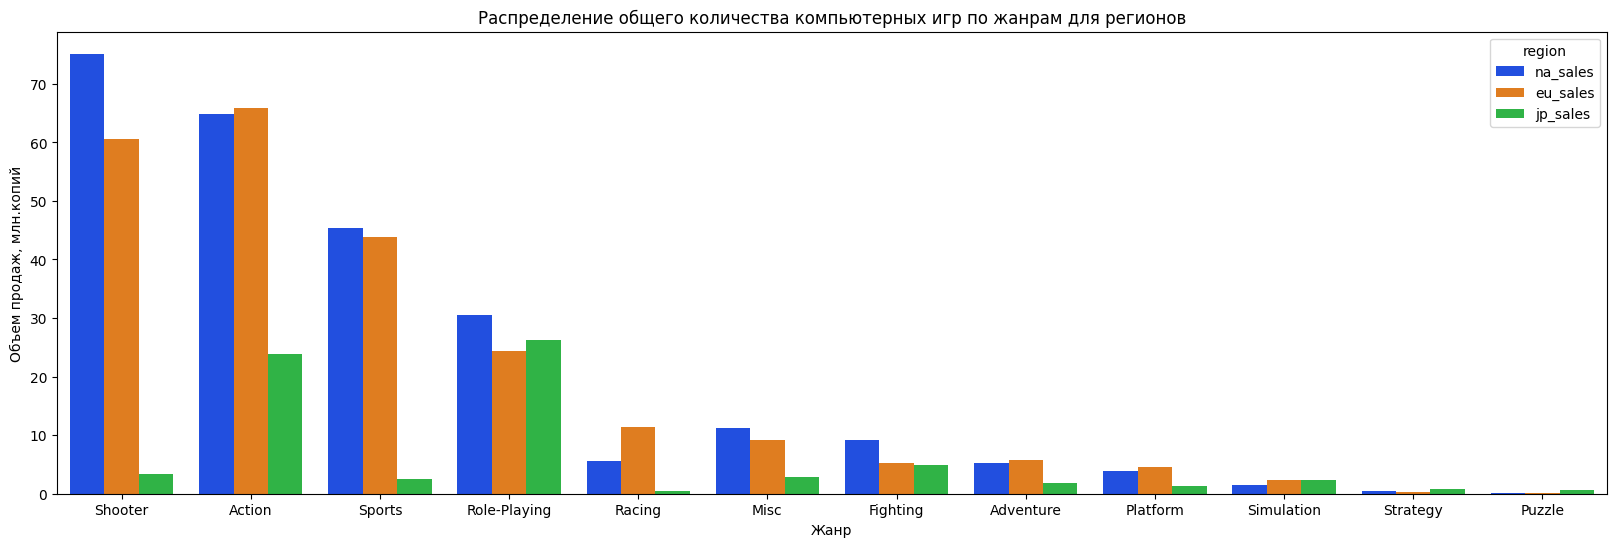

In [476]:
#Построим общую столбчатую диаграмму 
plt.figure(figsize=(20, 6))
df = sb.barplot(data= genre_region, 
           x='genre', y='total_sales', hue = 'region', palette ='bright')
df.set(xlabel='Жанр', 
       ylabel='Объем продаж, млн.копий', 
       title='Распределение общего количества компьютерных игр по жанрам для регионов')
plt.show()

In [477]:
# Сгруппируем данные по жанрам и регионам, проссумируем продажи по регионам и применим функцию melt, 
# чтобы привести таблицу к удобному виду для построения общей диаграммы по регионам и платформам.
rating_region = platform_lider_three_year.groupby('rating', as_index=False)\
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})\
    .melt(id_vars=['rating'])\
    .rename(columns={'variable' : 'region', 'value' : 'total_sales'})\
    .sort_values('total_sales', ascending=False).reset_index(drop=True)

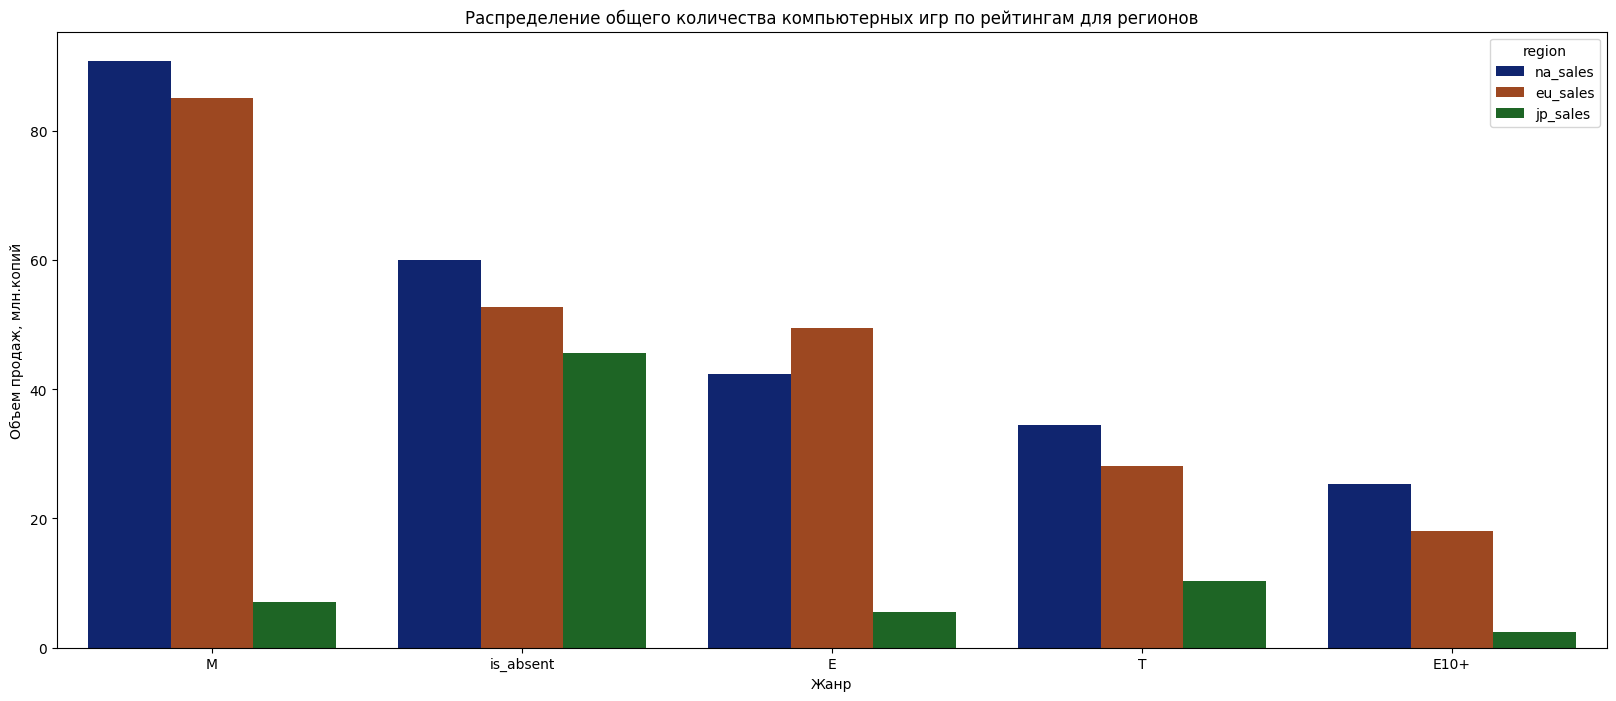

In [478]:
#Построим общую столбчатую диаграмму 
plt.figure(figsize=(20, 8))
df = sb.barplot(data= rating_region, 
           x='rating', y='total_sales', hue = 'region', palette ='dark')
df.set(xlabel='Жанр', 
       ylabel='Объем продаж, млн.копий', 
       title='Распределение общего количества компьютерных игр по рейтингам для регионов')
plt.show()

**Промежуточный вывод:** Из графиков видно, что регионы Северной Америки и Европейские регионы схожи в выборе платформ, жанров игр, так же в этих регионах популярны игры для взрослых. Япония отличаются по этим параметрам в связи с инным менталитетом (интересами, традициями), в Японии Nintendo 3DS является одной из самых успешных систем за всю историю существования рынка. Так же Японии очень много игр с неопределенным рейтингом, возможно они просто не подлежат обязательной проверки на рейтинг, тк компания ESRB была создана, для принятия и определения рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

## Проверка гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    * Задайте самостоятельно пороговое значение alpha.
    * Поясните:
          * Как вы сформулировали нулевую и альтернативную гипотезы;
          * Какой критерий применили для проверки гипотез и почему.

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H₀: средние пользовательские рейтинги платформ Xbox One и PC равны
* H₁: средние пользовательские рейтинги платформ Xbox One и PC не равны
* alpha = 0.05

In [479]:
#Сделаем срез нужных данных
sample_11 = data[(data['platform'] == 'XOne')&
                (data['tbd']==False)&
                (~data['user_score'].isna())&
                (data['year_of_release']>2013)]['user_score']
len(sample_11)

165

In [480]:
sample_12 = data[(data['platform'] == 'PC')&
                (data['tbd']==False)&
                (~data['user_score'].isna()&
                (data['year_of_release']>2013))]['user_score']
len(sample_12)

122

Выборки получились достаточно большие (более 30 значений), не равные по размеру. Применим t-тест — он работает для выборки любого размера. Будем предполагать, что дисперсии выборок не равны. 

In [481]:
# Вызов метода для проверки гипотезы. equal_var = False)
results = st.ttest_ind(
    sample_11, 
    sample_12, equal_var = False)
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Промежуточный вывод:** Согласно исследованию нулевую гипотезу не удалось опровергнуть. Можно предполагать, что пользовательские рейтинги платформ Xbox One и PC равны.

### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные
* H₀: средние пользовательские рейтинги жанров Action и Sports равны
* H₁: средние пользовательские рейтинги жанров Action и Sports не равны

In [482]:
#Сделаем срез нужных данных
sample_21 = data[(data['genre'] == 'Action')&
                (data['tbd']==False)&
                (~data['user_score'].isna())&
                (data['year_of_release']>2013)]['user_score']
len(sample_21)

297

In [483]:
sample_22 = data[(data['genre'] == 'Sports')&
                (data['tbd']==False)&
                (~data['user_score'].isna())&
                (data['year_of_release']>2013)]['user_score']
len(sample_22)

127

Выборки получились достаточно большие (более 30 значений), не равные по размеру. Применим t-тест — он работает для выборки любого размера. Будем предполагать, что дисперсии выборок не равны. 

In [484]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    sample_21, 
    sample_22, equal_var = False)

# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Промежуточный вывод:** Согласно исследованию нулевую гипотезу удалось опровергнуть. Можно предполагать, что пользовательские рейтинги жанров Action и Sports не равны.

## Общий вывод
* Исследовательский анализ показал, что основной пик выпуска видео игр пришелся на 2008 и 2009 года, затем идет спад с каждым годом.
* Определен жизненный цикл платформ - 6 лет. Но есть и исключения - платформа PC к 2016 году существовала уже 31 год (персональный компьютер, что собственно логично).
* Выбран актуальный период (3 года), для дальнейшего анализа, на основе которого будем делать прогнозы на 2017г.
* Определен топ-5 платформ за 2013-2016 годы (лидер PS4), однако тедеция спада продаж очень заметна.
* Среднее значение продаж для всех платформ сравнимое, но есть отдельные игры, которые дают основной объем продаж.
* Для платформ из топ-5 проверили корреляцию мужду объемами продаж и оценками критиков/оценками пользователей. Выяснилось, что с оценкой критиков есть небольшая положительная корреляция, а от оценки пользователей объемы продаж не зависят.
* Прибыльными являются игры с жанром Shooter, Role-Playing, Sports, Action и Platform. Самым не прибыльными жанрами из предоставленных данных являеются Strategy, Adventure и Puzzle.
* Портреты пользователей регионов показали, что регионы Северной Америки и Европейские регионы схожи в выборе платформ (PS4, XOne), жанров игр (Shooter, Action, Sports), так же в этих регионах популярны игры для взрослых (рейтинг M). Япония отличаются по этим параметрам в связи с инным менталитетом (интересами, традициями), это нужно учитывать, если расчитывать на это рынок продаж.
* Проверили две гипотезы о средних пользовательских рейтингах. В результате проверки гипотез, можно предполагать что: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports различны.

* В прогнозе на 2017 год можно посоветовать продавать игры для платформ PS4, 3DS, XOne. Так же нужно учесть жанры игр - для NA и EU регионов популярные Action, Sports, Shooter, для JP региона Role-Playing, Action, Fighting. Однако общая тендецния продаж видео игр идет на спад, это тоже нужно учитывать.